In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,LSTM

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['18GU','total'])
    lista_twt2.append(twt_ods[date].loc['013B','total'])
    lista_twt3.append(twt_ods[date].loc['021S','total'])
    lista_twt4.append(twt_ods[date].loc['219M','total'])
    lista_twt5.append(twt_ods[date].loc['01CA','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['18GU','total'])
    lista_ine2.append(ine_ods[date].loc['013B','total'])
    lista_ine3.append(ine_ods[date].loc['021S','total'])
    lista_ine4.append(ine_ods[date].loc['219M','total'])
    lista_ine5.append(ine_ods[date].loc['01CA','total'])
    

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,0
2020-04-02,0
2020-04-03,0
2020-04-04,0
2020-04-05,0


In [10]:
df_ine.head()

,Viajes
2020-04-01,3314
2020-04-02,3220
2020-04-03,3934
2020-04-04,3141
2020-04-05,2520


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,1.148148
std,1.467235
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,6.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,4188.802469
std,922.684743
min,2282.000000
25%,3503.000000
50%,4243.000000
75%,4933.000000
max,5827.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,0.800000
2020-05-31,1.548387
2020-06-30,1.050000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,3410.966667
2020-05-31,4262.193548
2020-06-30,5241.800000


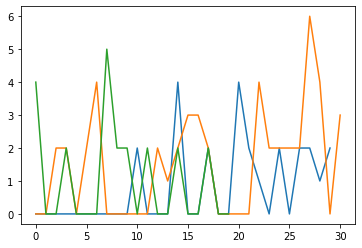

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

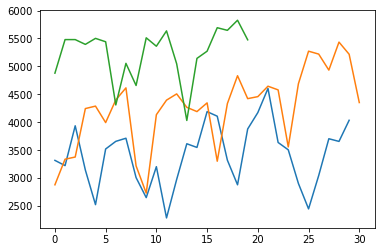

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
dataset_twt = df_twt.values
dataset_twt = dataset_twt.astype('float32')

dataset_ine = df_ine.values
dataset_ine = dataset_ine.astype('float32')

In [22]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

# Dividimos los datos en sets de entrenamiento y validacion

In [23]:
#dividimos nuestros valores entre sets de entrenamiento y de test
n_train_days = 60
train_twt = dataset_twt[:n_train_days, :]
test_twt = dataset_twt[n_train_days:, :]

train_ine = dataset_ine[:n_train_days, :]
test_ine = dataset_ine[n_train_days:, :]

print(len(train_twt), len(test_twt))

60 21


In [24]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset1, dataset2, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [25]:
# dividimos en entradas y salidas
look_back = 7
trainX, trainY = create_dataset(train_twt, train_ine, look_back)
testX, testY = create_dataset(test_twt, test_ine, look_back)

print(len(trainX), len(testY))

53 14


In [26]:
print(trainX)

[[[[0.29111427 0.        ]]

  [[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]]


 [[[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]]


 [[[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]]


 [[[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]]


 [[[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]

  [[0.

In [27]:
print(trainY)

[0.40310293 0.20394921 0.10267985 0.25923836 0.         0.19464034
 0.37517637 0.3565585  0.53765875 0.5145275  0.29196054 0.16755998
 0.44992954 0.5328632  0.65500706 0.38166434 0.34442878 0.17433006
 0.04569817 0.21438646 0.40056425 0.387024   0.49393517 0.16755998
 0.29703808 0.3080395  0.5531735  0.5655853  0.4823696  0.59689707
 0.6578279  0.2631876  0.12552893 0.5221439  0.59576875 0.62736255
 0.5593794  0.5379408  0.58194643 0.28688294 0.57856137 0.719323
 0.60338503 0.61354023 0.6662906  0.64767283 0.3590973  0.6787024
 0.84344155 0.82877296 0.7478139  0.88942176 0.8279267 ]


In [28]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 2))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 2))

In [29]:
print(trainX)

[[[0.29111427 0.        ]
  [0.26459807 0.        ]
  [0.46600848 0.        ]
  [0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]]

 [[0.26459807 0.        ]
  [0.46600848 0.        ]
  [0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]]

 [[0.46600848 0.        ]
  [0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  [0.20394921 0.        ]]

 [[0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  [0.20394921 0.        ]
  [0.10267985 0.        ]]

 [[0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  [0.20394921 0.        ]
  [0.10267985 0.        ]
  [0.25923836 0.33333334]]

 [[0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  

In [30]:
print(trainY)

[0.40310293 0.20394921 0.10267985 0.25923836 0.         0.19464034
 0.37517637 0.3565585  0.53765875 0.5145275  0.29196054 0.16755998
 0.44992954 0.5328632  0.65500706 0.38166434 0.34442878 0.17433006
 0.04569817 0.21438646 0.40056425 0.387024   0.49393517 0.16755998
 0.29703808 0.3080395  0.5531735  0.5655853  0.4823696  0.59689707
 0.6578279  0.2631876  0.12552893 0.5221439  0.59576875 0.62736255
 0.5593794  0.5379408  0.58194643 0.28688294 0.57856137 0.719323
 0.60338503 0.61354023 0.6662906  0.64767283 0.3590973  0.6787024
 0.84344155 0.82877296 0.7478139  0.88942176 0.8279267 ]


# Creamos la red neuronal

In [31]:
def crear_modeloFF():
    model = Sequential() 
    model.add(LSTM(20, input_shape=(look_back,2), return_sequences=True))
    model.add(LSTM(50, input_shape=(look_back,2), return_sequences=True))
    model.add(Dropout(0.30))
    model.add(LSTM(100, input_shape=(look_back,2)))
    model.add(Dropout(0.30))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

In [32]:
model = crear_modeloFF()

history=model.fit(trainX, trainY, epochs=200, validation_data=(testX,testY), batch_size=1, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 20)             1840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
____________________________________________________

Epoch 123/200
53/53 - 0s - loss: 0.0168 - val_loss: 0.0201
Epoch 124/200
53/53 - 0s - loss: 0.0183 - val_loss: 0.0176
Epoch 125/200
53/53 - 0s - loss: 0.0186 - val_loss: 0.0225
Epoch 126/200
53/53 - 0s - loss: 0.0166 - val_loss: 0.0359
Epoch 127/200
53/53 - 0s - loss: 0.0163 - val_loss: 0.0257
Epoch 128/200
53/53 - 0s - loss: 0.0214 - val_loss: 0.0170
Epoch 129/200
53/53 - 0s - loss: 0.0181 - val_loss: 0.0301
Epoch 130/200
53/53 - 0s - loss: 0.0200 - val_loss: 0.0245
Epoch 131/200
53/53 - 0s - loss: 0.0154 - val_loss: 0.0255
Epoch 132/200
53/53 - 0s - loss: 0.0153 - val_loss: 0.0250
Epoch 133/200
53/53 - 0s - loss: 0.0187 - val_loss: 0.0315
Epoch 134/200
53/53 - 0s - loss: 0.0183 - val_loss: 0.0212
Epoch 135/200
53/53 - 0s - loss: 0.0150 - val_loss: 0.0225
Epoch 136/200
53/53 - 0s - loss: 0.0155 - val_loss: 0.0201
Epoch 137/200
53/53 - 0s - loss: 0.0187 - val_loss: 0.0220
Epoch 138/200
53/53 - 0s - loss: 0.0169 - val_loss: 0.0213
Epoch 139/200
53/53 - 0s - loss: 0.0146 - val_loss: 0.01

# Visualizamos resultados

In [33]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100 # it is a percentage
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [34]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY_scalerInverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_scalerInverse = scaler.inverse_transform([testY])

In [35]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse[0], testPredict[:,0])
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 275.85 MAE
Resultado del entrenamiento: 116373.22 MSE
Resultado del entrenamiento: 341.14 RMSE
Resultado del entrenamiento: 8.74 CVRMSE
Resultado del entrenamiento: 7.40 MAPE 

Resultado del test: 410.21 MAE
Resultado del test: 245314.84 MSE
Resultado del test: 495.29 RMSE
Resultado del test: 9.54 CVRMSE
Resultado del test: 8.29 MAPE


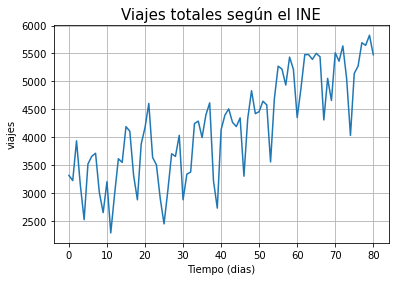

In [36]:
plt.plot(df_ine.values)
plt.grid(True)
plt.title("Viajes totales según el INE", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

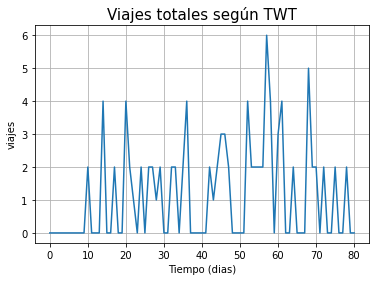

In [37]:
plt.plot(df_twt.values)
plt.grid(True)
plt.title("Viajes totales según TWT", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

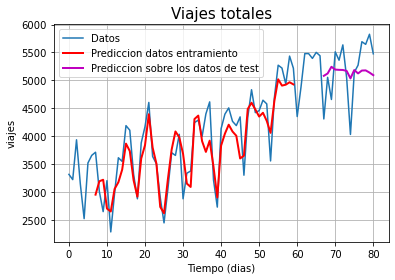

In [38]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset_ine)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset_ine)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset_ine), :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_ine))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

In [39]:
results=testPredict
print(len(results))

14


In [40]:
test = testY_scalerInverse[0]

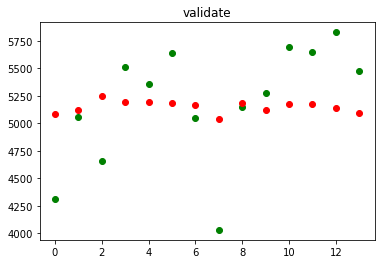

In [41]:
plt.scatter(range(len(test)),test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

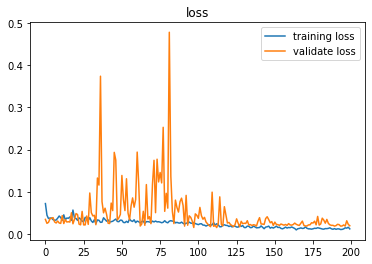

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

In [43]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

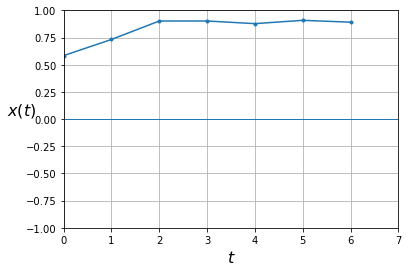

In [44]:
n_steps = 6
plot_series(testX[0, :, 0], testY_scalerInverse[0, 0], testPredict[0, 0])
plt.show()

# Exportar los datos

In [45]:
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-06-07', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(testPredict, index= index_days)
prediccion.columns = ['valor predicho']

prediccion

,valor predicho
2020-06-07,5081.331543
2020-06-08,5123.187988
2020-06-09,5243.335938
2020-06-10,5193.077148
2020-06-11,5188.407715
2020-06-12,5186.291992
2020-06-13,5169.513184
2020-06-14,5035.458008
2020-06-15,5185.013184
2020-06-16,5124.452637


In [46]:
datosReales = df_ine['2020-6-07':'2020-6-20']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']

compara

,real,prediccion
2020-06-07,4308,5081.331543
2020-06-08,5054,5123.187988
2020-06-09,4657,5243.335938
2020-06-10,5512,5193.077148
2020-06-11,5361,5188.407715
2020-06-12,5636,5186.291992
2020-06-13,5046,5169.513184
2020-06-14,4030,5035.458008
2020-06-15,5143,5185.013184
2020-06-16,5272,5124.452637


In [47]:
compara.to_excel('Resultados INE - TWT.xlsx', columns=['real', 'prediccion'])

# Prediccion a futuro

In [48]:
# usaremos 7 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-25':'2020-5-31']
Dias_ine = df_ine['2020-5-25':'2020-5-31']

In [49]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos, en este caso modificada para ayudarnos a crear
#los distintos sets de entrenmiento para distintos modelos que predeciran 1 dia cada uno

def create_dataset2(dataset1, dataset2, look_back=1, dias=0):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back-dias):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back + dias, 0])
  return np.array(dataX), np.array(dataY)

In [50]:
#ahora crearemos los sets para entrenar los modelos
look_back = 7

trainX1, trainY1 = create_dataset2(train_twt, train_ine, look_back, 1)
testX1, testY1 = create_dataset2(test_twt, test_ine, look_back, 1)

trainX2, trainY2 = create_dataset2(train_twt, train_ine, look_back, 2)
testX2, testY2 = create_dataset2(test_twt, test_ine, look_back, 2)

trainX3, trainY3 = create_dataset2(train_twt, train_ine, look_back, 3)
testX3, testY3 = create_dataset2(test_twt, test_ine, look_back, 3)

trainX4, trainY4 = create_dataset2(train_twt, train_ine, look_back, 4)
testX4, testY4 = create_dataset2(test_twt, test_ine, look_back, 4)

trainX5, trainY5 = create_dataset2(train_twt, train_ine, look_back, 5)
testX5, testY5 = create_dataset2(test_twt, test_ine, look_back, 5)

trainX6, trainY6 = create_dataset2(train_twt, train_ine, look_back, 6)
testX6, testY6 = create_dataset2(test_twt, test_ine, look_back, 6)

In [51]:
print(trainX1)

[[[[0.29111427 0.        ]]

  [[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]]


 [[[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]]


 [[[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]]


 [[[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]]


 [[[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]

  [[0.

In [52]:
print(trainY1)

[0.20394921 0.10267985 0.25923836 0.         0.19464034 0.37517637
 0.3565585  0.53765875 0.5145275  0.29196054 0.16755998 0.44992954
 0.5328632  0.65500706 0.38166434 0.34442878 0.17433006 0.04569817
 0.21438646 0.40056425 0.387024   0.49393517 0.16755998 0.29703808
 0.3080395  0.5531735  0.5655853  0.4823696  0.59689707 0.6578279
 0.2631876  0.12552893 0.5221439  0.59576875 0.62736255 0.5593794
 0.5379408  0.58194643 0.28688294 0.57856137 0.719323   0.60338503
 0.61354023 0.6662906  0.64767283 0.3590973  0.6787024  0.84344155
 0.82877296 0.7478139  0.88942176 0.8279267 ]


In [53]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]

trainX1 = np.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 2))
testX1 = np.reshape(testX1, (testX1.shape[0], testX1.shape[1], 2))

trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 2))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 2))

trainX3 = np.reshape(trainX3, (trainX3.shape[0], trainX3.shape[1], 2))
testX3 = np.reshape(testX3, (testX3.shape[0], testX3.shape[1], 2))

trainX4 = np.reshape(trainX4, (trainX4.shape[0], trainX4.shape[1], 2))
testX4 = np.reshape(testX4, (testX4.shape[0], testX4.shape[1], 2))

trainX5 = np.reshape(trainX5, (trainX5.shape[0], trainX5.shape[1], 2))
testX5 = np.reshape(testX5, (testX5.shape[0], testX5.shape[1], 2))

trainX6 = np.reshape(trainX6, (trainX6.shape[0], trainX6.shape[1], 2))
testX6 = np.reshape(testX6, (testX6.shape[0], testX6.shape[1], 2))

In [54]:
#creamos los distintos modelos para predecir cada dia

model1 = crear_modeloFF()
history=model1.fit(trainX1, trainY1, epochs=200, validation_data=(testX1,testY1), batch_size=1, verbose=2)

model2 = crear_modeloFF()
history=model2.fit(trainX2, trainY2, epochs=200, validation_data=(testX2,testY2), batch_size=1, verbose=2)

model3 = crear_modeloFF()
history=model3.fit(trainX3, trainY3, epochs=200, validation_data=(testX3,testY3), batch_size=1, verbose=2)

model4 = crear_modeloFF()
history=model4.fit(trainX4, trainY4, epochs=200, validation_data=(testX4,testY4), batch_size=1, verbose=2)

model5 = crear_modeloFF()
history=model5.fit(trainX5, trainY5, epochs=200, validation_data=(testX5,testY5), batch_size=1, verbose=2)

model6 = crear_modeloFF()
history=model6.fit(trainX6, trainY6, epochs=200, validation_data=(testX6,testY6), batch_size=1, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 20)             1840      
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
__________________________________________________

52/52 - 0s - loss: 0.0221 - val_loss: 0.0213
Epoch 123/200
52/52 - 0s - loss: 0.0248 - val_loss: 0.0236
Epoch 124/200
52/52 - 0s - loss: 0.0220 - val_loss: 0.0182
Epoch 125/200
52/52 - 0s - loss: 0.0207 - val_loss: 0.0179
Epoch 126/200
52/52 - 0s - loss: 0.0204 - val_loss: 0.0187
Epoch 127/200
52/52 - 0s - loss: 0.0220 - val_loss: 0.0176
Epoch 128/200
52/52 - 0s - loss: 0.0204 - val_loss: 0.0188
Epoch 129/200
52/52 - 0s - loss: 0.0191 - val_loss: 0.0224
Epoch 130/200
52/52 - 0s - loss: 0.0191 - val_loss: 0.0171
Epoch 131/200
52/52 - 0s - loss: 0.0190 - val_loss: 0.0173
Epoch 132/200
52/52 - 0s - loss: 0.0189 - val_loss: 0.0170
Epoch 133/200
52/52 - 0s - loss: 0.0190 - val_loss: 0.0220
Epoch 134/200
52/52 - 0s - loss: 0.0165 - val_loss: 0.0170
Epoch 135/200
52/52 - 0s - loss: 0.0221 - val_loss: 0.0492
Epoch 136/200
52/52 - 0s - loss: 0.0195 - val_loss: 0.0183
Epoch 137/200
52/52 - 0s - loss: 0.0216 - val_loss: 0.0177
Epoch 138/200
52/52 - 0s - loss: 0.0190 - val_loss: 0.0187
Epoch 139/2

Epoch 43/200
51/51 - 0s - loss: 0.0296 - val_loss: 0.0306
Epoch 44/200
51/51 - 0s - loss: 0.0295 - val_loss: 0.0397
Epoch 45/200
51/51 - 0s - loss: 0.0323 - val_loss: 0.1274
Epoch 46/200
51/51 - 0s - loss: 0.0282 - val_loss: 0.3688
Epoch 47/200
51/51 - 0s - loss: 0.0346 - val_loss: 0.2707
Epoch 48/200
51/51 - 0s - loss: 0.0312 - val_loss: 0.0579
Epoch 49/200
51/51 - 0s - loss: 0.0357 - val_loss: 0.3999
Epoch 50/200
51/51 - 0s - loss: 0.0302 - val_loss: 0.1925
Epoch 51/200
51/51 - 0s - loss: 0.0329 - val_loss: 0.4906
Epoch 52/200
51/51 - 0s - loss: 0.0300 - val_loss: 0.4729
Epoch 53/200
51/51 - 0s - loss: 0.0324 - val_loss: 0.1608
Epoch 54/200
51/51 - 0s - loss: 0.0285 - val_loss: 0.4295
Epoch 55/200
51/51 - 0s - loss: 0.0304 - val_loss: 0.1671
Epoch 56/200
51/51 - 0s - loss: 0.0292 - val_loss: 0.0995
Epoch 57/200
51/51 - 0s - loss: 0.0271 - val_loss: 0.3281
Epoch 58/200
51/51 - 0s - loss: 0.0373 - val_loss: 0.2233
Epoch 59/200
51/51 - 0s - loss: 0.0313 - val_loss: 0.6312
Epoch 60/200
5

Epoch 183/200
51/51 - 0s - loss: 0.0149 - val_loss: 0.0197
Epoch 184/200
51/51 - 0s - loss: 0.0138 - val_loss: 0.0200
Epoch 185/200
51/51 - 0s - loss: 0.0130 - val_loss: 0.0259
Epoch 186/200
51/51 - 0s - loss: 0.0151 - val_loss: 0.0216
Epoch 187/200
51/51 - 0s - loss: 0.0154 - val_loss: 0.0206
Epoch 188/200
51/51 - 0s - loss: 0.0145 - val_loss: 0.0197
Epoch 189/200
51/51 - 0s - loss: 0.0105 - val_loss: 0.0238
Epoch 190/200
51/51 - 0s - loss: 0.0112 - val_loss: 0.0253
Epoch 191/200
51/51 - 0s - loss: 0.0125 - val_loss: 0.0278
Epoch 192/200
51/51 - 0s - loss: 0.0150 - val_loss: 0.0270
Epoch 193/200
51/51 - 0s - loss: 0.0127 - val_loss: 0.0349
Epoch 194/200
51/51 - 0s - loss: 0.0142 - val_loss: 0.0303
Epoch 195/200
51/51 - 0s - loss: 0.0095 - val_loss: 0.0277
Epoch 196/200
51/51 - 0s - loss: 0.0109 - val_loss: 0.0256
Epoch 197/200
51/51 - 0s - loss: 0.0107 - val_loss: 0.0494
Epoch 198/200
51/51 - 0s - loss: 0.0127 - val_loss: 0.0360
Epoch 199/200
51/51 - 0s - loss: 0.0146 - val_loss: 0.02

50/50 - 0s - loss: 0.0211 - val_loss: 0.1365
Epoch 105/200
50/50 - 0s - loss: 0.0214 - val_loss: 0.0537
Epoch 106/200
50/50 - 0s - loss: 0.0240 - val_loss: 0.0745
Epoch 107/200
50/50 - 0s - loss: 0.0213 - val_loss: 0.0761
Epoch 108/200
50/50 - 0s - loss: 0.0212 - val_loss: 0.0502
Epoch 109/200
50/50 - 0s - loss: 0.0200 - val_loss: 0.1386
Epoch 110/200
50/50 - 0s - loss: 0.0251 - val_loss: 0.0967
Epoch 111/200
50/50 - 0s - loss: 0.0228 - val_loss: 0.0413
Epoch 112/200
50/50 - 0s - loss: 0.0186 - val_loss: 0.0765
Epoch 113/200
50/50 - 0s - loss: 0.0193 - val_loss: 0.0393
Epoch 114/200
50/50 - 0s - loss: 0.0200 - val_loss: 0.0584
Epoch 115/200
50/50 - 0s - loss: 0.0189 - val_loss: 0.0944
Epoch 116/200
50/50 - 0s - loss: 0.0237 - val_loss: 0.0309
Epoch 117/200
50/50 - 0s - loss: 0.0176 - val_loss: 0.0422
Epoch 118/200
50/50 - 0s - loss: 0.0213 - val_loss: 0.0285
Epoch 119/200
50/50 - 0s - loss: 0.0195 - val_loss: 0.0254
Epoch 120/200
50/50 - 0s - loss: 0.0185 - val_loss: 0.0358
Epoch 121/2

49/49 - 0s - loss: 0.0464 - val_loss: 0.0257
Epoch 25/200
49/49 - 0s - loss: 0.0332 - val_loss: 0.0739
Epoch 26/200
49/49 - 0s - loss: 0.0324 - val_loss: 0.0764
Epoch 27/200
49/49 - 0s - loss: 0.0398 - val_loss: 0.1065
Epoch 28/200
49/49 - 0s - loss: 0.0300 - val_loss: 0.0426
Epoch 29/200
49/49 - 0s - loss: 0.0324 - val_loss: 0.0825
Epoch 30/200
49/49 - 0s - loss: 0.0319 - val_loss: 0.1831
Epoch 31/200
49/49 - 0s - loss: 0.0283 - val_loss: 0.4902
Epoch 32/200
49/49 - 0s - loss: 0.0269 - val_loss: 0.3762
Epoch 33/200
49/49 - 0s - loss: 0.0312 - val_loss: 0.6175
Epoch 34/200
49/49 - 0s - loss: 0.0333 - val_loss: 0.2866
Epoch 35/200
49/49 - 0s - loss: 0.0251 - val_loss: 1.2835
Epoch 36/200
49/49 - 0s - loss: 0.0362 - val_loss: 0.2701
Epoch 37/200
49/49 - 0s - loss: 0.0282 - val_loss: 0.1263
Epoch 38/200
49/49 - 0s - loss: 0.0276 - val_loss: 0.5924
Epoch 39/200
49/49 - 0s - loss: 0.0234 - val_loss: 0.9323
Epoch 40/200
49/49 - 0s - loss: 0.0288 - val_loss: 0.5080
Epoch 41/200
49/49 - 0s - l

Epoch 165/200
49/49 - 0s - loss: 0.0098 - val_loss: 0.0310
Epoch 166/200
49/49 - 0s - loss: 0.0100 - val_loss: 0.0288
Epoch 167/200
49/49 - 0s - loss: 0.0098 - val_loss: 0.0324
Epoch 168/200
49/49 - 0s - loss: 0.0116 - val_loss: 0.0264
Epoch 169/200
49/49 - 0s - loss: 0.0120 - val_loss: 0.0255
Epoch 170/200
49/49 - 0s - loss: 0.0086 - val_loss: 0.0288
Epoch 171/200
49/49 - 0s - loss: 0.0080 - val_loss: 0.0303
Epoch 172/200
49/49 - 0s - loss: 0.0119 - val_loss: 0.0376
Epoch 173/200
49/49 - 0s - loss: 0.0087 - val_loss: 0.0463
Epoch 174/200
49/49 - 0s - loss: 0.0093 - val_loss: 0.0375
Epoch 175/200
49/49 - 0s - loss: 0.0095 - val_loss: 0.0301
Epoch 176/200
49/49 - 0s - loss: 0.0080 - val_loss: 0.0490
Epoch 177/200
49/49 - 0s - loss: 0.0080 - val_loss: 0.0324
Epoch 178/200
49/49 - 0s - loss: 0.0118 - val_loss: 0.0340
Epoch 179/200
49/49 - 0s - loss: 0.0082 - val_loss: 0.0454
Epoch 180/200
49/49 - 0s - loss: 0.0087 - val_loss: 0.0369
Epoch 181/200
49/49 - 0s - loss: 0.0090 - val_loss: 0.02

Epoch 86/200
48/48 - 0s - loss: 0.0202 - val_loss: 0.2011
Epoch 87/200
48/48 - 0s - loss: 0.0214 - val_loss: 0.1102
Epoch 88/200
48/48 - 0s - loss: 0.0218 - val_loss: 0.1528
Epoch 89/200
48/48 - 0s - loss: 0.0221 - val_loss: 0.0310
Epoch 90/200
48/48 - 0s - loss: 0.0229 - val_loss: 0.0534
Epoch 91/200
48/48 - 0s - loss: 0.0192 - val_loss: 0.1230
Epoch 92/200
48/48 - 0s - loss: 0.0175 - val_loss: 0.1532
Epoch 93/200
48/48 - 0s - loss: 0.0209 - val_loss: 0.0767
Epoch 94/200
48/48 - 0s - loss: 0.0191 - val_loss: 0.0530
Epoch 95/200
48/48 - 0s - loss: 0.0203 - val_loss: 0.1000
Epoch 96/200
48/48 - 0s - loss: 0.0186 - val_loss: 0.1180
Epoch 97/200
48/48 - 0s - loss: 0.0226 - val_loss: 0.0499
Epoch 98/200
48/48 - 0s - loss: 0.0192 - val_loss: 0.0709
Epoch 99/200
48/48 - 0s - loss: 0.0225 - val_loss: 0.0908
Epoch 100/200
48/48 - 0s - loss: 0.0181 - val_loss: 0.1848
Epoch 101/200
48/48 - 0s - loss: 0.0210 - val_loss: 0.0773
Epoch 102/200
48/48 - 0s - loss: 0.0166 - val_loss: 0.1237
Epoch 103/2

Epoch 6/200
47/47 - 0s - loss: 0.0379 - val_loss: 0.0877
Epoch 7/200
47/47 - 0s - loss: 0.0452 - val_loss: 0.0434
Epoch 8/200
47/47 - 0s - loss: 0.0350 - val_loss: 0.1409
Epoch 9/200
47/47 - 0s - loss: 0.0388 - val_loss: 0.0267
Epoch 10/200
47/47 - 0s - loss: 0.0517 - val_loss: 0.1103
Epoch 11/200
47/47 - 0s - loss: 0.0446 - val_loss: 0.0575
Epoch 12/200
47/47 - 0s - loss: 0.0401 - val_loss: 0.0711
Epoch 13/200
47/47 - 0s - loss: 0.0382 - val_loss: 0.0287
Epoch 14/200
47/47 - 0s - loss: 0.0421 - val_loss: 0.0300
Epoch 15/200
47/47 - 0s - loss: 0.0403 - val_loss: 0.0601
Epoch 16/200
47/47 - 0s - loss: 0.0386 - val_loss: 0.0689
Epoch 17/200
47/47 - 0s - loss: 0.0439 - val_loss: 0.0424
Epoch 18/200
47/47 - 2s - loss: 0.0403 - val_loss: 0.0457
Epoch 19/200
47/47 - 0s - loss: 0.0404 - val_loss: 0.0612
Epoch 20/200
47/47 - 0s - loss: 0.0368 - val_loss: 0.0436
Epoch 21/200
47/47 - 0s - loss: 0.0426 - val_loss: 0.0281
Epoch 22/200
47/47 - 0s - loss: 0.0353 - val_loss: 0.0354
Epoch 23/200
47/47

Epoch 147/200
47/47 - 0s - loss: 0.0112 - val_loss: 0.0117
Epoch 148/200
47/47 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 149/200
47/47 - 0s - loss: 0.0097 - val_loss: 0.0118
Epoch 150/200
47/47 - 0s - loss: 0.0126 - val_loss: 0.0157
Epoch 151/200
47/47 - 0s - loss: 0.0105 - val_loss: 0.0152
Epoch 152/200
47/47 - 0s - loss: 0.0116 - val_loss: 0.0147
Epoch 153/200
47/47 - 0s - loss: 0.0144 - val_loss: 0.0174
Epoch 154/200
47/47 - 0s - loss: 0.0131 - val_loss: 0.0106
Epoch 155/200
47/47 - 0s - loss: 0.0130 - val_loss: 0.0117
Epoch 156/200
47/47 - 0s - loss: 0.0101 - val_loss: 0.0117
Epoch 157/200
47/47 - 0s - loss: 0.0124 - val_loss: 0.0132
Epoch 158/200
47/47 - 0s - loss: 0.0139 - val_loss: 0.0114
Epoch 159/200
47/47 - 0s - loss: 0.0110 - val_loss: 0.0111
Epoch 160/200
47/47 - 0s - loss: 0.0095 - val_loss: 0.0092
Epoch 161/200
47/47 - 0s - loss: 0.0112 - val_loss: 0.0176
Epoch 162/200
47/47 - 0s - loss: 0.0100 - val_loss: 0.0073
Epoch 163/200
47/47 - 0s - loss: 0.0111 - val_loss: 0.02

# Preparamos los datos para el test

In [55]:
# cargamos el dataframe en la variable dataset
dataset_twt = Dias_twt.values
dataset_ine = Dias_ine.values

# convertimos los enteros en floats
dataset_twt = dataset_twt.astype('float32')
dataset_ine = dataset_ine.astype('float32')

# normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

In [56]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset3(dataset1, dataset2):
  dataX = []
  for x in range(len(dataset2)):
    dataX.append(dataset2[x])  
    dataX.append(dataset1[x])
  dataX = np.array(dataX)
  dataX = np.reshape(dataX, (7, 1, 2))
  return np.array(dataX)

In [57]:
# usamos la funcion definida previamente para crear el dataset
testX = create_dataset3(dataset_twt, dataset_ine)

In [58]:
#remodelamos los datos
testX = np.reshape(testX, (1, 7, 2))

# Realizamos la prediccion 

In [59]:
results = []

parcial=model.predict(testX)
results.append(parcial[0])

parcial=model1.predict(testX)
results.append(parcial[0])

parcial=model2.predict(testX)
results.append(parcial[0])

parcial=model3.predict(testX)
results.append(parcial[0])

parcial=model4.predict(testX)
results.append(parcial[0])

parcial=model5.predict(testX)
results.append(parcial[0])

parcial=model6.predict(testX)
results.append(parcial[0])

results = np.reshape(results, (7, 1))
print(results)

[[0.69647956]
 [0.8054796 ]
 [0.7714046 ]
 [0.7826257 ]
 [0.7079072 ]
 [0.7361294 ]
 [0.2904085 ]]


# Re-Convertimos los resultados

In [60]:
inverted = scaler.inverse_transform(results)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)

inverted

array([[5106],
       [5224],
       [5187],
       [5199],
       [5118],
       [5149],
       [4666]])

# Visualizamos el pronostico

<AxesSubplot:>

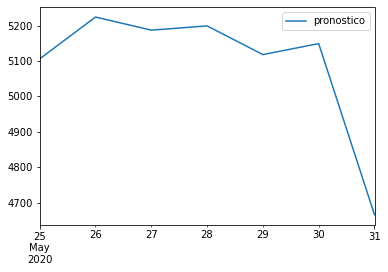

In [61]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [62]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,4688,5106
2020-05-26,5272,5224
2020-05-27,5220,5187
2020-05-28,4933,5199
2020-05-29,5435,5118
2020-05-30,5217,5149
2020-05-31,4351,4666


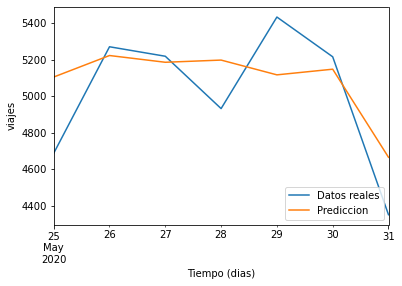

In [63]:
compara['real'].plot()
compara['prediccion'].plot()
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.legend( ('Datos reales', 'Prediccion'), loc = 'lower right')

In [64]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 209.29 MAE
Resultado del test: 64744.43 MSE
Resultado del test: 254.45 RMSE
Resultado del test: 5.00 CVRMSE
Resultado del test: 4.16 MAPE


In [65]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 418.00 MAE
Resultado del test dia 1: 174724.00 MSE
Resultado del test dia 1: 418.00 RMSE
Resultado del test dia 1: 8.19 CVRMSE
Resultado del test dia 1: 8.19 MAPE 

Resultado del test dia 2: 48.00 MAE
Resultado del test dia 2: 2304.00 MSE
Resultado del test dia 2: 48.00 RMSE
Resultado del test dia 2: 0.92 CVRMSE
Resultado del test dia 2: 0.92 MAPE 

Resultado del test dia 3: 33.00 MAE
Resultado del test dia 3: 1089.00 MSE
Resultado del test dia 3: 33.00 RMSE
Resultado del test dia 3: 0.64 CVRMSE
Resultado del test dia 3: 0.64 MAPE 

Resultado del test dia 4: 266.00 MAE
Resultado del test dia 4: 70756.00 MSE
Resultado del test dia 4: 266.00 RMSE
Resultado del test dia 4: 5.12 CVRMSE
Resultado del test dia 4: 5.12 MAPE 

Resultado del test dia 5: 317.00 MAE
Resultado del test dia 5: 100489.00 MSE
Resultado del test dia 5: 317.00 RMSE
Resultado del test dia 5: 6.19 CVRMSE
Resultado del test dia 5: 6.19 MAPE 

Resultado del test dia 6: 68.00 MAE
Resultado del test